In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import random_statevector, Statevector
import matplotlib.pyplot as plt

# Generate a random 2-qubit state |psi>
random_state = random_statevector(4)  # 4 for 2 qubits (2^2)
random_state = Statevector(random_state.data)  # Normalize

# Quantum Circuit
qc = QuantumCircuit(6, 2)  # 6 qubits (C1, C2, A1, A2, B1, B2), 2 classical bits for measurement

# Initialize |psi> on A1 and A2, B1 and B2
qc.initialize(random_state, [2, 3])  # Initialize A1 and A2
qc.initialize(random_state, [4, 5])  # Initialize B1 and B2

# Apply Hadamard gates on C1 and C2
qc.h(0)  # C1
qc.h(1)  # C2

# Controlled gates
qc.cx(0, 2)  # C1 -> A1
qc.cx(0, 4)  # C1 -> B1
qc.cx(1, 3)  # C2 -> A2
qc.cx(1, 5)  # C2 -> B2

# Hadamard gates on C1 and C2
qc.h(0)  # C1
qc.h(1)  # C2

# Measurement on C1 and C2
qc.measure(0, 0)
qc.measure(1, 1)

# Draw the circuit
print("Quantum Circuit:")
print(qc.draw(output='text'))
qc.draw(output='mpl')
plt.show()

# Simulate the circuit
simulator = AerSimulator()  # Initialize the AerSimulator
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc).result()
counts = result.get_counts()

# Print counts for debugging
print("Counts:", counts)

# Plot the histogram
print("Measurement Results:")
fig = plot_histogram(counts)
plt.show()
from qiskit.quantum_info import partial_trace, DensityMatrix
import numpy as np

# Compute the full density matrix for the subsystem [2, 3]
rho_12 = DensityMatrix(random_state)  # Convert the random state to a density matrix

# Compute reduced density matrices
rho_1 = partial_trace(rho_12, [1])  # Trace out qubit 3 to get rho_1
rho_2 = partial_trace(rho_12, [0])  # Trace out qubit 2 to get rho_2

# Compute Tr[rho_alpha^2] for all reduced density matrices
tr_rho1_squared = np.trace(rho_1.data @ rho_1.data)
tr_rho2_squared = np.trace(rho_2.data @ rho_2.data)
tr_rho12_squared = np.trace(rho_12.data @ rho_12.data)

# Compute the function value
c_s = 2  # Given in the equation
function_value = (1 / (2 ** c_s)) * (tr_rho1_squared + tr_rho2_squared + tr_rho12_squared)

# Print the results
print("Tr[ρ1^2]:", tr_rho1_squared)
print("Tr[ρ2^2]:", tr_rho2_squared)
print("Tr[ρ12^2]:", tr_rho12_squared)
print("Function Value:", function_value)


Quantum Circuit:
     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
c: 2/»
     »
«                                              ┌───┐                                         »
«q_0: ─────────────────────────────────────────┤ H ├─────────────────────────────────────────»
«                                              ├───┤                                         »
«q_1: ─────────────────────────────────────────┤ H ├─────────────────────────────────────────»
«     ┌────────────────────────────────────────┴───┴────────────────────────────────────────┐»
«q_2: ┤0                                                                                    ├»
«     │  Initialize(0.095577+0.11479j,-0.17418+0.13974j,-0.023442+0.19035j,0.68192-0.6527j) │»
«q_3: ┤1                                                                                    ├»
«     ├─────────────────────────────────────────────────────────────────────────────────────┤»
«q_4: ┤0               

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Generate a random 2-qubit state |psi>
random_state = random_statevector(4)  # 4 for 2 qubits (2^2)
random_state = Statevector(random_state.data)  # Normalize

# Create the Quantum Circuit
qc = QuantumCircuit(6, 2)  # 6 qubits (C1, C2, A1, A2, B1, B2) and 2 classical bits for measurement

# Initialize |psi> on A1, A2 and B1, B2
qc.initialize(random_state, [2, 3])  # Initialize A1 and A2
qc.initialize(random_state, [4, 5])  # Initialize B1 and B2

# Apply Hadamard gates on C1 and C2
qc.h(0)  # C1
qc.h(1)  # C2

# Controlled gates between C1 and A1, B1
qc.cx(0, 2)  # C1 -> A1
qc.cx(0, 4)  # C1 -> B1

# Controlled gates between C2 and A2, B2
qc.cx(1, 3)  # C2 -> A2
qc.cx(1, 5)  # C2 -> B2

# Additional controlled gates
qc.cx(2, 3)  # A1 -> A2
qc.cx(3, 2)  # A2 -> A1 (to mimic swapping or interaction)
qc.cx(4, 5)  # B1 -> B2
qc.cx(5, 4)  # B2 -> B1 (to mimic swapping or interaction)

# Hadamard gates on C1 and C2 again
qc.h(0)  # C1
qc.h(1)  # C2

# Measurement on C1 and C2
qc.measure(0, 0)
qc.measure(1, 1)

# Draw the circuit
print("Quantum Circuit:")
print(qc.draw(output='text'))
qc.draw(output='mpl')
plt.show()

# Simulate the circuit
simulator = AerSimulator()  # Initialize the AerSimulator
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1000).result()  # Run simulation with 1024 shots
counts = result.get_counts()

# Print measurement results
print("Measurement Results:")
print(counts)

# Plot the histogram
plot_histogram(counts)
plt.show()


from qiskit.quantum_info import partial_trace, DensityMatrix
import numpy as np

# Compute the full density matrix for the subsystem [2, 3]
rho_12 = DensityMatrix(random_state)  # Convert the random state to a density matrix

# Compute reduced density matrices
rho_1 = partial_trace(rho_12, [1])  # Trace out qubit 3 to get rho_1
rho_2 = partial_trace(rho_12, [0])  # Trace out qubit 2 to get rho_2

# Compute Tr[rho_alpha^2] for all reduced density matrices
tr_rho1_squared = np.trace(rho_1.data @ rho_1.data)
tr_rho2_squared = np.trace(rho_2.data @ rho_2.data)
tr_rho12_squared = np.trace(rho_12.data @ rho_12.data)

# Compute the function value
c_s = 2  # Given in the equation
function_value = (1 / (2 ** c_s)) * (tr_rho1_squared + tr_rho2_squared + tr_rho12_squared)

# Print the results
print("Tr[ρ1^2]:", tr_rho1_squared)
print("Tr[ρ2^2]:", tr_rho2_squared)
print("Tr[ρ12^2]:", tr_rho12_squared)
print("Function Value:", function_value)


Quantum Circuit:
     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
c: 2/»
     »
«                                             ┌───┐                                         »
«q_0: ────────────────────────────────────────┤ H ├─────────────────────────────────────────»
«                                             ├───┤                                         »
«q_1: ────────────────────────────────────────┤ H ├─────────────────────────────────────────»
«     ┌───────────────────────────────────────┴───┴────────────────────────────────────────┐»
«q_2: ┤0                                                                                   ├»
«     │  Initialize(0.58405-0.028233j,-0.43289+0.17606j,0.36027+0.52791j,0.10068-0.14516j) │»
«q_3: ┤1                                                                                   ├»
«     ├────────────────────────────────────────────────────────────────────────────────────┤»
«q_4: ┤0                        

Tr[ρ1^2]: (0.7365672259911197+0j)
Tr[ρ2^2]: (0.7365672259911198+0j)
Tr[ρ12^2]: (0.9999999999999998+0j)
Function Value: (0.15457090324888995+0j)
['11', '00']
[137, 887]


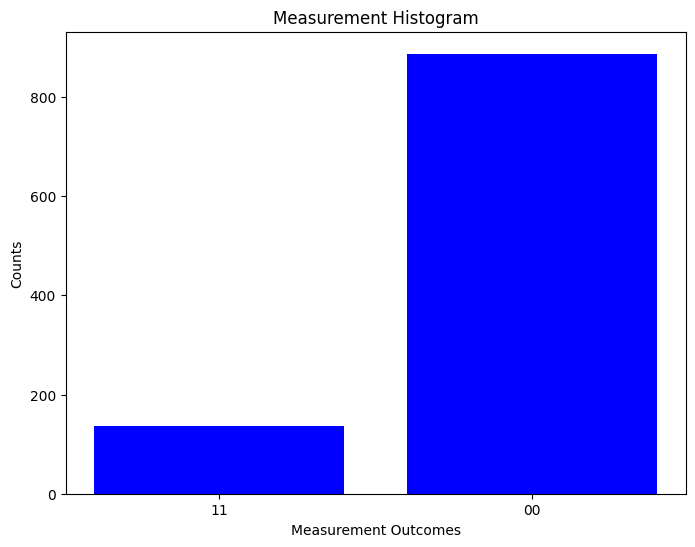

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator  # Import AerSimulator from qiskit_aer
from qiskit.quantum_info import random_statevector, Statevector, partial_trace, DensityMatrix
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Create a random 2-qubit state
state = random_statevector(4)  # 4 for a 2-qubit system

# Create the circuit
qc = QuantumCircuit(6, 2)

# Initialize both |ψ⟩ states as the same random two-qubit state
qc.initialize(state.data, [2, 3])  # |ψ⟩ on qubits A1, A2
qc.initialize(state.data, [4, 5])  # |ψ⟩ on qubits B1, B2

# Apply Hadamard gates to control qubits
qc.h(0)
qc.h(1)

qc.cx(4,2)
qc.cx(5,3)
# Add Toffoli gates (controlled-controlled-X gates)
qc.ccx(0, 2, 4)
qc.ccx(1, 3, 5)
qc.cx(4,2)
qc.cx(5,3
)


# Apply Hadamard gates again
qc.h(0)
qc.h(1)

# Measure the control qubits
qc.measure([0, 1], [0, 1])

# Draw the circuit
qc.draw('mpl')

# Simulate the circuit and plot the histogram
# Simulate the circuit and plot the histogram
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)
plt.show()

# Plot the histogram
plot_histogram(counts)
plt.show()

# Compute the full density matrix for the subsystem [2, 3]
rho_12 = DensityMatrix(state)  # Convert the random state to a density matrix

# Compute reduced density matrices
rho_1 = partial_trace(rho_12, [1])  # Trace out qubit 3 to get rho_1
rho_2 = partial_trace(rho_12, [0])  # Trace out qubit 2 to get rho_2

# Compute Tr[rho_alpha^2] for all reduced density matrices
tr_rho1_squared = np.trace(rho_1.data @ rho_1.data)
tr_rho2_squared = np.trace(rho_2.data @ rho_2.data)
tr_rho12_squared = np.trace(rho_12.data @ rho_12.data)

# Compute the function value
c_s = 4  # Given in the equation
function_value = (1 / (2 ** c_s)) * (tr_rho1_squared + tr_rho2_squared + tr_rho12_squared)

# Print the results
print("Tr[ρ1^2]:", tr_rho1_squared)
print("Tr[ρ2^2]:", tr_rho2_squared)
print("Tr[ρ12^2]:", tr_rho12_squared)
print("Function Value:", function_value)


labels = list(counts.keys())
values = list(counts.values())

print(labels)
print(values)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='blue')
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('Measurement Histogram')
plt.show()


Tr[ρ1^2]: (0.4999999999999998+0j)
Tr[ρ2^2]: (0.4999999999999998+0j)
Tr[ρ12^2]: (0.9999999999999996+0j)
Function Value: (0.7499999999999999+0j)
['11', '00']
[242, 758]


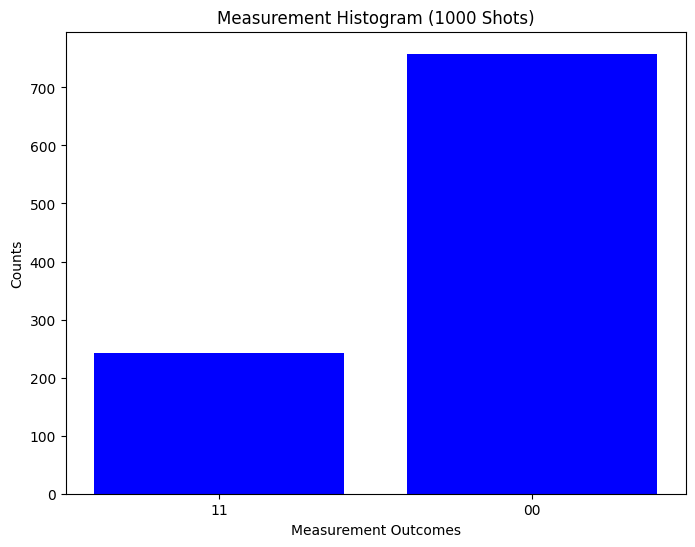

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import partial_trace, DensityMatrix
import numpy as np
import matplotlib.pyplot as plt

# Create the circuit
qc = QuantumCircuit(6, 2)

# Initialize the Bell state |ψ⟩ = (1/√2)(|00⟩ + |11⟩) on qubits A1, A2 and B1, B2
# For A1, A2
qc.h(2)  # Apply Hadamard gate on qubit 2
qc.cx(2, 3)  # Controlled-X gate between qubit 2 and qubit 3

# For B1, B2
qc.h(4)  # Apply Hadamard gate on qubit 4
qc.cx(4, 5)  # Controlled-X gate between qubit 4 and qubit 5

# Apply Hadamard gates to control qubits
qc.h(0)
qc.h(1)

# Add CX gates for interaction between A and B
qc.cx(4, 2)
qc.cx(5, 3)

# Add Toffoli gates (controlled-controlled-X gates)
qc.ccx(0, 2, 4)
qc.ccx(1, 3, 5)
qc.cx(4, 2)
qc.cx(5, 3)

# Apply Hadamard gates again
qc.h(0)
qc.h(1)

# Measure the control qubits
qc.measure([0, 1], [0, 1])

# Simulate the circuit with 1000 shots
simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()  # Set shots=1000
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)
plt.show()

# Compute the full density matrix for the subsystem [2, 3]
rho_12 = DensityMatrix([1 / np.sqrt(2), 0, 0, 1 / np.sqrt(2)])  # Bell state density matrix

# Compute reduced density matrices
rho_1 = partial_trace(rho_12, [1])  # Trace out qubit 3 to get rho_1
rho_2 = partial_trace(rho_12, [0])  # Trace out qubit 2 to get rho_2

# Compute Tr[rho_alpha^2] for all reduced density matrices
tr_rho1_squared = np.trace(rho_1.data @ rho_1.data)
tr_rho2_squared = np.trace(rho_2.data @ rho_2.data)
tr_rho12_squared = np.trace(rho_12.data @ rho_12.data)

# Compute the function value
c_s = 2  # Given in the equation
function_value = (1 / (2 ** c_s)) * (tr_rho1_squared + tr_rho2_squared + 2)

# Print the results
print("Tr[ρ1^2]:", tr_rho1_squared)
print("Tr[ρ2^2]:", tr_rho2_squared)
print("Tr[ρ12^2]:", tr_rho12_squared)
print("Function Value:", function_value)

labels = list(counts.keys())
values = list(counts.values())

print(labels)
print(values)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='blue')
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('Measurement Histogram (1000 Shots)')
plt.show()




Quantum Circuit:
     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
c: 2/»
     »
«                                             ┌───┐                                        »
«q_0: ────────────────────────────────────────┤ H ├────────────────────────────────────────»
«                                             ├───┤                                        »
«q_1: ────────────────────────────────────────┤ H ├────────────────────────────────────────»
«     ┌───────────────────────────────────────┴───┴───────────────────────────────────────┐»
«q_2: ┤0                                                                                  ├»
«     │  Initialize(0.46824+0.017991j,0.4163+0.24196j,0.36222+0.055747j,0.51921+0.38038j) │»
«q_3: ┤1                                                                                  ├»
«     ├───────────────────────────────────────────────────────────────────────────────────┤»
«q_4: ┤0                                 

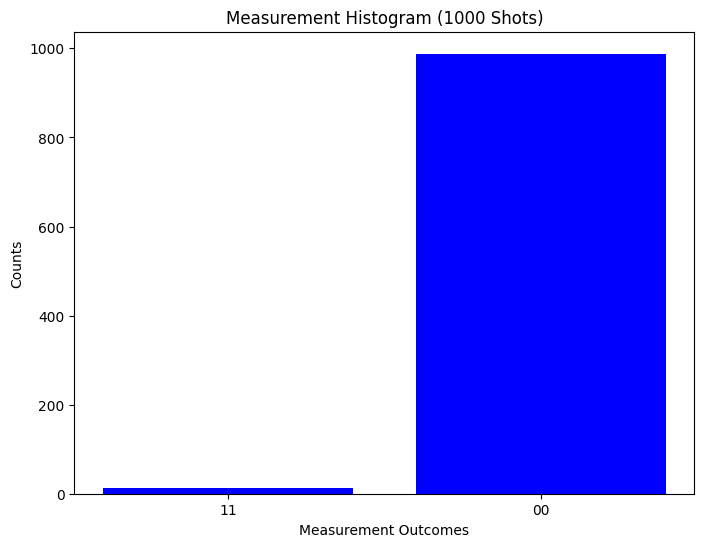

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import partial_trace, DensityMatrix
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a random 2-qubit state
def random_two_qubit_state():
    state = np.random.rand(4) + 1j * np.random.rand(4)  # Complex random numbers
    state = state / np.linalg.norm(state)  # Normalize the state
    return state

# Create the circuit
qc = QuantumCircuit(6, 2)

# **Step 1: Keep Qubits 0 and 1 as |00⟩ (No Initialization Needed)**

# **Step 2: Generate and Apply a Random Two-Qubit State**
random_state = random_two_qubit_state()
qc.initialize(random_state, [2, 3])  # Apply random state to qubits 2 and 3
qc.initialize(random_state, [4, 5])  # Apply same random state to qubits 4 and 5

# Apply Hadamard gates to control qubits (0 and 1)
qc.h(0)
qc.h(1)

# Add CX gates for interaction between A and B
qc.cx(4, 2)
qc.cx(5, 3)

# Add Toffoli gates (controlled-controlled-X gates)
qc.ccx(0, 2, 4)
qc.ccx(1, 3, 5)
qc.cx(4, 2)
qc.cx(5, 3)

# Apply Hadamard gates again
qc.h(0)
qc.h(1)

# Measure the control qubits
qc.measure([0, 1], [0, 1])

# **Draw the circuit**
qc.draw('mpl')
plt.show()
print("Quantum Circuit:")
print(qc.draw(output='text'))
qc.draw(output='mpl')
plt.show()

# **Simulate the circuit**
simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()

# **Plot the measurement histogram**
plot_histogram(counts)
plt.show()

# **Compute the full density matrix for the subsystem [2, 3]**
rho_12 = DensityMatrix(np.outer(random_state, random_state.conj()))  # Convert pure state to density matrix

# **Compute reduced density matrices**
rho_1 = partial_trace(rho_12, [1])  # Trace out qubit 3 to get rho_1
rho_2 = partial_trace(rho_12, [0])  # Trace out qubit 2 to get rho_2

# **Compute Tr[rho_alpha^2] for all reduced density matrices**
tr_rho1_squared = np.trace(rho_1.data @ rho_1.data)
tr_rho2_squared = np.trace(rho_2.data @ rho_2.data)
tr_rho12_squared = np.trace(rho_12.data @ rho_12.data)

# **Compute the function value**
c_s = 2  # Given in the equation
function_value = (1 / (2 ** c_s)) * (tr_rho1_squared + tr_rho2_squared + 2)

# **Print the results**
print("Tr[ρ1^2]:", tr_rho1_squared)
print("Tr[ρ2^2]:", tr_rho2_squared)
print("Tr[ρ12^2]:", tr_rho12_squared)
print("Function Value:", function_value)

# **Extract labels and values from counts**
labels = list(counts.keys())
values = list(counts.values())

print(labels)
for i in range(2):
    print(2*(values[i]/1000)-1)
print(values)


# **Plot the histogram using Matplotlib**
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='blue')
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('Measurement Histogram (1000 Shots)')
plt.show()


In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import partial_trace, DensityMatrix
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import DensityMatrix, partial_trace

def partial_trace_define(state, subsystem_trace_out, dimension):
    """
    Compute the partial trace of a density matrix by tracing out the specified subsystem.
    
    Args:
    - state: The density matrix (as a numpy array or qiskit DensityMatrix object).
    - subsystem_trace_out: List of subsystems to trace out (e.g., [0, 1] means trace out qubits 0 and 1).
    - dimension: The total dimension of the quantum system (for example, 2^n for n qubits).
    
    Returns:
    - The reduced density matrix after tracing out the specified subsystems.
    """
    
    # Ensure that the state is a DensityMatrix object
    if isinstance(state, np.ndarray):
        rho = DensityMatrix(state)
    else:
        rho = state
    
    # Perform the partial trace using Qiskit's partial_trace function
    reduced_rho = partial_trace(rho, subsystem_trace_out)
    
    return reduced_rho

# from qiskit.quantum_info import partial_trace, DensityMatrix
# import numpy as np

# def partial_trace_define(state, subsystem_trace_out, dimension):
#     """
#     Compute the partial trace of a density matrix by tracing out the specified subsystem.

#     Args:
#     - state: The density matrix (as a numpy array or qiskit DensityMatrix object).
#     - subsystem_trace_out: List of subsystems to trace out (e.g., [0, 1] means trace out qubits 0 and 1).
#     - dimension: A list specifying the dimensions of each subsystem.

#     Returns:
#     - The reduced density matrix after tracing out the specified subsystems.
#     """

#     # Ensure that the state is a DensityMatrix object
#     if isinstance(state, np.ndarray):
#         rho = DensityMatrix(state)
#     else:
#         rho = state

#     # Ensure subsystem_trace_out indices are within range
#     num_subsystems = len(dimension)
#     if any(q >= num_subsystems for q in subsystem_trace_out):
#         raise ValueError("Subsystem indices out of range.")

#     # Perform the partial trace using Qiskit's partial_trace function
#     reduced_rho = partial_trace(rho, subsystem_trace_out, dims=dimension)

#     return reduced_rho


# Example usage:
# Let's say we have a 4-qubit state and we want to trace out qubit 1 (assuming qubits 0,1,2,3).
# First, we initialize a state (here we are using a simple random 4-qubit state for demonstration):
# state = np.random.rand(16) + 1j * np.random.rand(16)  # Random complex state vector
# state = state / np.linalg.norm(state)  # Normalize the state
density_matrix = np.outer(state, state.conj())  # Create density matrix

# Perform the partial trace by tracing out qubit 1 (subsystem_trace_out = [1])
dimension = 8  # 4-qubit system (2^4 = 16 dimensions)
result = partial_trace_define(density_matrix, [1,2,3], dimension)

# Display the result

# Function to generate a random 3-qubit state
def random_three_qubit_state():
    state = np.random.rand(8) + 1j * np.random.rand(8)  # Complex random numbers
    state = state / np.linalg.norm(state)  # Normalize the state
    return state

# Create the circuit (9 qubits, 3 classical bits for measurement)
qc = QuantumCircuit(9, 3)

# **Step 1: Keep Qubits 0,1,2 as |000⟩ (No Initialization Needed)**

# **Step 2: Generate and Apply a Random Three-Qubit State**
random_state = random_three_qubit_state()
qc.initialize(random_state, [3, 4, 5])  # Apply random state to qubits 3,4,5
qc.initialize(random_state, [6, 7, 8])  # Apply same random state to qubits 6,7,8

# Apply Hadamard gates to control qubits (0, 1, 2)
qc.h(0)
qc.h(1)
qc.h(2)

# Add CX gates for interaction between the parties
qc.cx(6, 3)
qc.cx(7, 4)
qc.cx(8, 5)

# Add Toffoli gates (controlled-controlled-X gates)
qc.ccx(0, 3, 6)
qc.ccx(1, 4, 7)
qc.ccx(2, 5, 8)

qc.cx(6, 3)
qc.cx(7, 4)
qc.cx(8, 5)

# Apply Hadamard gates again
qc.h(0)
qc.h(1)
qc.h(2)

# Measure the control qubits
qc.measure([0, 1, 2], [0, 1, 2])

# **Draw the circuit**
qc.draw('mpl')
plt.show()
print("Quantum Circuit:")
print(qc.draw(output='text'))
qc.draw(output='mpl')
plt.show()

# **Simulate the circuit**
simulator = AerSimulator()
result = simulator.run(qc, shots=1000000).result()
counts = result.get_counts()

# **Plot the measurement histogram**
plot_histogram(counts)
plt.show()

# **Compute the full density matrix for the subsystem [3, 4, 5]**
rho_123 = DensityMatrix(np.outer(random_state, random_state.conj()))  # Convert pure state to density matrix

# **Compute reduced density matrices**
rho_0 =partial_trace(rho_123,[1,2])
rho_1 =partial_trace(rho_123,[0,2])
rho_2 =partial_trace(rho_123,[0,1])
# rho_01 =partial_trace_define(rho_123,[2],8)
# rho_02 =partial_trace_define(rho_123,[1],8)
# rho_12 =partial_trace_define(rho_123,[0],8)

# **Compute Tr[rho_alpha^2] for all reduced density matrices**
tr_rho0_squared = np.trace(rho_0.data @ rho_0.data)
tr_rho1_squared = np.trace(rho_1.data @ rho_1.data)
tr_rho2_squared = np.trace(rho_2.data @ rho_2.data)
# tr_rho01_squared = np.trace(rho_01.data @ rho_01.data)
# tr_rho02_squared = np.trace(rho_02.data @ rho_02.data)
# tr_rho12_squared = np.trace(rho_12.data @ rho_12.data)
# **Compute the function value**
c_s = 3  # Since we now have 3 parties
# function_value = (1 / (2 ** c_s)) * (tr_rho0_squared + tr_rho1_squared +tr_rho2_squared +tr_rho01_squared  +tr_rho02_squared +tr_rho12_squared + 2)

# **Print the results**
# print("Tr[ρ1^2]:", tr_rho1_squared)
# print("Tr[ρ2^2]:", tr_rho2_squared)
# print("Tr[ρ3^2]:", tr_rho3_squared)
# print("Tr[ρ123^2]:", tr_rho123_squared)
# print("Function Value:", function_value)
print("rho_0_square",tr_rho0_squared)
print("rho_1_square",tr_rho1_squared)
print("rho_2_square",tr_rho2_squared)
# print("rho_01_square",(1/16)*tr_rho01_squared)
# print("rho_02_square",(1/16)*tr_rho02_squared)
# print("rho_12_square",(1/16)*tr_rho12_squared)


# **Extract labels and values from counts**
labels = list(counts.keys())
values = list(counts.values())

print(labels)
print(values)
p_000 = counts.get('000', 0) / 1000000
p_011 = counts.get('011', 0) / 1000000
p_101 = counts.get('101', 0) / 1000000
p_110 = counts.get('110', 0) / 1000000

print("tr_0_prob",p_000+p_011)
print("tr_1_prob",p_000+p_101)
print("tr_2_prob",p_000+p_110)

# plot_histogram(counts)

# # **Plot the histogram using Matplotlib**
# plt.figure(figsize=(8, 6))
# plt.bar(labels, values, color='blue')
# plt.xlabel('Measurement Outcomes')
# plt.ylabel('Counts')
# plt.title('Measurement Histogram (1000 Shots)')
# plt.show()


NameError: name 'state' is not defined

Tr[ρ0^2] = (0.7199944673030713+0j)
Tr[ρ1^2] = (0.6975275485041355+0j)
Tr[ρ2^2] = (0.8925389012333187+0j)
tr_0_prob 0.8926879999999999
tr_1_prob 0.69566
tr_2_prob 0.71922


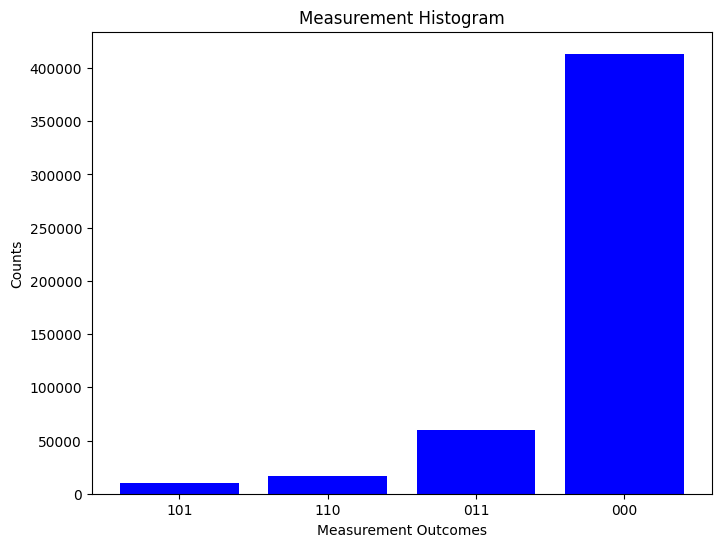

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import partial_trace, DensityMatrix
import numpy as np
import matplotlib.pyplot as plt

def partial_trace_define(state, subsystem_trace_out):
    """
    Compute the partial trace of a density matrix by tracing out the specified subsystems.
    
    Args:
    - state: The density matrix (as a numpy array or Qiskit DensityMatrix object).
    - subsystem_trace_out: List of subsystems to trace out.
    
    Returns:
    - The reduced density matrix after tracing out the specified subsystems.
    """
    if isinstance(state, np.ndarray):
        rho = DensityMatrix(state)
    else:
        rho = state
    
    reduced_rho = partial_trace(rho, subsystem_trace_out)
    return reduced_rho

def random_three_qubit_state():
    """Generate a normalized random three-qubit state."""
    state = np.random.rand(8) + 1j * np.random.rand(8)
    state = state / np.linalg.norm(state)
    return state

# Generate a random 3-qubit state
state = random_three_qubit_state()

# Compute the full density matrix
density_matrix = np.outer(state, state.conj())

# Compute reduced density matrices
rho_0 = partial_trace_define(density_matrix, [1, 2])
rho_1 = partial_trace_define(density_matrix, [0, 2])
rho_2 = partial_trace_define(density_matrix, [0, 1])

# Compute purity (Tr[rho^2]) for each reduced density matrix
tr_rho0_squared = np.trace(rho_0.data @ rho_0.data)
tr_rho1_squared = np.trace(rho_1.data @ rho_1.data)
tr_rho2_squared = np.trace(rho_2.data @ rho_2.data)

print("Tr[ρ0^2] =", tr_rho0_squared)
print("Tr[ρ1^2] =", tr_rho1_squared)
print("Tr[ρ2^2] =", tr_rho2_squared)

# Create the quantum circuit
qc = QuantumCircuit(9, 3)

# Apply a random 3-qubit state to qubits 3-5 and 6-8
qc.initialize(state, [3, 4, 5])
qc.initialize(state, [6, 7, 8])

# Apply Hadamard gates to qubits 0, 1, 2
qc.h([0, 1, 2])

# Apply CX gates
qc.cx(6, 3)
qc.cx(7, 4)
qc.cx(8, 5)

# Apply Toffoli (CCX) gates
qc.ccx(0, 3, 6)
qc.ccx(1, 4, 7)
qc.ccx(2, 5, 8)

qc.cx(6, 3)
qc.cx(7, 4)
qc.cx(8, 5)

# Apply Hadamard gates again
qc.h([0, 1, 2])

# Measure qubits 0, 1, 2
qc.measure([0, 1, 2], [0, 1, 2])

# Simulate the circuit
simulator = AerSimulator()
result = simulator.run(qc, shots=500000).result()
counts = result.get_counts()

# Plot histogram
plot_histogram(counts)
plt.show()

# Compute probabilities for specific measurement outcomes
p_000 = counts.get('000', 0) / 500000
p_011 = counts.get('011', 0) / 500000
p_101 = counts.get('101', 0) / 500000
p_110 = counts.get('110', 0) / 500000

print("tr_0_prob", 2*(p_000 + p_011)-1)
print("tr_1_prob", 2*(p_000 + p_101)-1)
print("tr_2_prob", 2*(p_000 + p_110)-1)

# Plot histogram using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(counts.keys(), counts.values(), color='blue')
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('Measurement Histogram')
plt.show()


rho_0_square (0.5+0j)
rho_1_square (0.5+0j)
rho_2_square (0.5+0j)
rho_3_square (0.5+0j)
rho_01_square (0.25+0j)
rho_02_square (0.5+0j)
rho_03_square (0.25+0j)
1: 0.5013200000000002
2 : 0.5026000000000002
3 0.49616000000000016
4 0.4960000000000002
12 0.12548000000000004
13 0.24896000000000007
14 0.12424000000000013
val= 0.675682425004864
value direct=: (0.6666666666666666+0j)


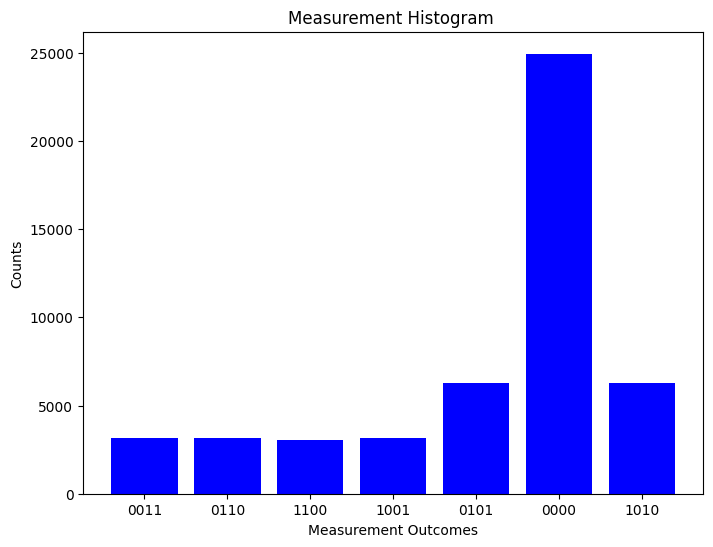

In [7]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import partial_trace, DensityMatrix
import matplotlib.pyplot as plt



x, y, z = np.pi/4,0,0# Example values; update as needed
sht = 50000
# Function to compute the matrix X and flatten it into a column vector
def compute_four_qubit_state(x, y, z):
    c_plus = np.cos(x + y)
    c_minus = np.cos(x - y)
    s_plus = np.sin(x + y)
    s_minus = np.sin(x - y)
    
    # Define the 4x4 matrix X
    X = np.array([
        [np.exp(-1j * z) * c_minus, 0, 0, -1j * np.exp(-1j * z) * s_minus],
        [0, np.exp(1j * z) * c_plus, -1j * np.exp(1j * z) * s_plus, 0],
        [0, -1j * np.exp(1j * z) * s_plus, np.exp(1j * z) * c_plus, 0],
        [-1j * np.exp(1j * z) * s_minus, 0, 0, np.exp(-1j * z) * c_minus],
    ])
    
    # Flatten X into a 16x1 column vector (in column-major order)
    state_vector = X.flatten(order="F")
    return state_vector / np.linalg.norm(state_vector)

# Replace random state vector with the computed four-qubit state

four_qubit_state = compute_four_qubit_state(x, y, z)

# Create the circuit (12 qubits, 4 classical bits for measurement)
qc = QuantumCircuit(12, 4)

# Step 1: Keep Qubits 0,1,2,3 as |0000⟩
# No initialization is needed; qubits are |0⟩ by default.

# Step 2: Apply the computed four-qubit state
qc.initialize(four_qubit_state, [4, 5, 6, 7])
qc.initialize(four_qubit_state, [8, 9, 10, 11])

# Apply Hadamard gates to control qubits (0, 1, 2, 3)
qc.h([0, 1, 2, 3])

# Add CX gates for entanglement
qc.cx(8, 4)
qc.cx(9, 5)
qc.cx(10, 6)
qc.cx(11, 7)

# Add Toffoli gates
qc.ccx(0, 4, 8)
qc.ccx(1, 5, 9)
qc.ccx(2, 6, 10)
qc.ccx(3, 7, 11)

qc.cx(8, 4)
qc.cx(9, 5)
qc.cx(10, 6)
qc.cx(11, 7)

# Apply Hadamard gates again
qc.h([0, 1, 2, 3])

# Measure the control qubits
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# Simulate the circuit

simulator = AerSimulator()
result = simulator.run(qc, shots=sht).result()
counts = result.get_counts()

# Plot the measurement histogram
plot_histogram(counts)
plt.show()

# Compute the full density matrix for the subsystem [4, 5, 6, 7]
rho_1234 = DensityMatrix(np.outer(four_qubit_state, four_qubit_state.conj()))

rho_0 = partial_trace(rho_1234, [1, 2, 3])
rho_1 = partial_trace(rho_1234, [0, 2, 3])
rho_2 = partial_trace(rho_1234, [0, 1, 3])
rho_3 = partial_trace(rho_1234, [0, 1, 2])
rho_01 = partial_trace(rho_1234, [2, 3])
rho_02 = partial_trace(rho_1234, [1, 3])
rho_03 = partial_trace(rho_1234, [1, 2])

# Compute Tr[rho_alpha^2]
tr_rho0_squared = np.trace(rho_0.data @ rho_0.data)
tr_rho1_squared = np.trace(rho_1.data @ rho_1.data)
tr_rho2_squared = np.trace(rho_2.data @ rho_2.data)
tr_rho3_squared = np.trace(rho_3.data @ rho_3.data)
tr_rho01_squared = np.trace(rho_01.data @ rho_01.data)
tr_rho02_squared = np.trace(rho_02.data @ rho_02.data)
tr_rho03_squared = np.trace(rho_03.data @ rho_03.data)

print("rho_0_square", tr_rho0_squared)
print("rho_1_square", tr_rho1_squared)
print("rho_2_square", tr_rho2_squared)
print("rho_3_square", tr_rho3_squared)
print("rho_01_square", tr_rho01_squared)
print("rho_02_square", tr_rho02_squared)
print("rho_03_square", tr_rho03_squared)

# Extract measurement results and compute probabilities
p_0000 = counts.get('0000', 0) / sht
p_0111 = counts.get('0111', 0) / sht
# Continue extracting probabilities as in your original code...
p_1011 = counts.get('1011', 0) / sht
p_1101 = counts.get('1101', 0) / sht
p_1110 = counts.get('1110', 0) / sht
p_1001 = counts.get('1001', 0) / sht
p_0101 = counts.get('0101', 0) / sht
p_0011 = counts.get('0011', 0) / sht
p_1100 = counts.get('1100', 0) / sht
p_1100 = counts.get('1100', 0) / sht
p_1100 = counts.get('1100', 0) / sht
p_1010 = counts.get('1010', 0) / sht
p_1000 = counts.get('1000', 0) / sht
p_0100 = counts.get('0100', 0) / sht
p_0010 = counts.get('0010', 0) / sht
p_0001 = counts.get('0001', 0) / sht
p_0110 = counts.get('0110', 0) / sht
p_1111 = counts.get('1111', 0) / sht


print("1:", 2 * (p_0000+p_0101+p_0011+p_0110 ) - 1)
print("2 :", 2 * (p_0000+p_1010+p_1001+p_0011) - 1)
print("3", 2 * (p_0000 + p_1100+p_1001+p_0101) - 1)
print("4", 2 * (p_0000 + p_1100+p_1010+p_0110) - 1)
print("12", 2 * (p_0000 + p_0011) - 1)
print("13", 2 * (p_0000 + p_1010) - 1)
print("14", 2 * (p_0000 + p_1001) - 1)


tr_3=2 * (p_0000+p_0101+p_0011+p_0110 ) - 1
tr_2=2 * (p_0000+p_1010+p_1001+p_0011) - 1
tr_1=2 * (p_0000 + p_1100+p_1001+p_0101) - 1
tr_0=2 * (p_0000 + p_1100+p_1010+p_0110) - 1
tr_01=2 * (p_0000 + p_0011+p_1100+p_1111) - 1
tr_02=2 * (p_0000 + p_1010+p_0101+p_1111) - 1
tr_03=2 * (p_0000 + p_1001+p_0110+p_1111) - 1

val=(1024/27)*(1-tr_3)*(1-tr_2)*(1-tr_1)*(1-tr_0)*(1-tr_01)*(1-tr_02)*(1-tr_03)
val1=(1024/27)*(1-tr_rho0_squared)*(1-tr_rho1_squared)*(1-tr_rho2_squared)*(1-tr_rho3_squared)*(1-tr_rho01_squared)*(1-tr_rho02_squared)*(1-tr_rho03_squared)
print("val=",val)
print("value direct=:",val1)

# **Plot the histogram using Matplotlib**
plt.figure(figsize=(8, 6))
plt.bar(counts.keys(), counts.values(), color='blue')
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('Measurement Histogram ')
plt.show()


In [2]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import partial_trace, DensityMatrix
import matplotlib.pyplot as plt

# Function to compute the matrix X and flatten it into a column vector
# def compute_four_qubit_state(x, y, z):
#     c_plus = np.cos(x + y)
#     c_minus = np.cos(x - y)
#     s_plus = np.sin(x + y)
#     s_minus = np.sin(x - y)
    
#     # Define the 4x4 matrix X
#     X = np.array([
#         [np.exp(-1j * z) * c_minus, 0, 0, -1j * np.exp(-1j * z) * s_minus],
#         [0, np.exp(1j * z) * c_plus, -1j * np.exp(1j * z) * s_plus, 0],
#         [0, -1j * np.exp(1j * z) * s_plus, np.exp(1j * z) * c_plus, 0],
#         [-1j * np.exp(1j * z) * s_minus, 0, 0, np.exp(-1j * z) * c_minus],
#     ])
    
#     # Flatten X into a 16x1 column vector (in column-major order)
#     state_vector = X.flatten(order="F")
#     return state_vector / np.linalg.norm(state_vector)

def compute_four_qubit_state(x, y, z):
    c_plus = np.cos(x + y)
    c_minus = np.cos(x - y)
    s_plus = np.sin(x + y)
    s_minus = np.sin(x - y)
    
    # Define the 4x4 matrix X with complex dtype
    X = np.array([
        [np.exp(-1j * z) * c_minus, 0, 0, -1j * np.exp(-1j * z) * s_minus],
        [0, np.exp(1j * z) * c_plus, -1j * np.exp(1j * z) * s_plus, 0],
        [0, -1j * np.exp(1j * z) * s_plus, np.exp(1j * z) * c_plus, 0],
        [-1j * np.exp(1j * z) * s_minus, 0, 0, np.exp(-1j * z) * c_minus],
    ], dtype=np.complex128)  # Corrected dtype
    
    state_vector = X.flatten(order="F")
    norm = np.linalg.norm(state_vector)
    # Avoid division by zero by adding a small epsilon if norm is zero
    # if norm == 0:
    #     norm = 1e-10  # Small epsilon to prevent division by zero
    return state_vector / norm



# def compute_four_qubit_state(x, y, z):
#     c_plus = np.cos(x + y)
#     c_minus = np.cos(x - y)
#     s_plus = np.sin(x + y)
#     s_minus = np.sin(x - y)
    
#     # Define the 4x4 matrix X
#     X = np.array([
#         [np.exp(-1j * z) * c_minus, 0, 0, -1j * np.exp(-1j * z) * s_minus],
#         [0, np.exp(1j * z) * c_plus, -1j * np.exp(1j * z) * s_plus, 0],
#         [0, -1j * np.exp(1j * z) * s_plus, np.exp(1j * z) * c_plus, 0],
#         [-1j * np.exp(1j * z) * s_minus, 0, 0, np.exp(-1j * z) * c_minus],
#     ], dtype=object)
    
#     # Flatten X into a 16x1 column vector (in column-major order)
#     state_vector = X.flatten(order="F")
#     return state_vector / np.linalg.norm(state_vector)



# Function to run the simulation, compute the probabilities and return the final value
def calculate_value(x, y, z, sht=1000):
    # Compute the four-qubit state
    four_qubit_state = compute_four_qubit_state(x, y, z)

    # Create the circuit (12 qubits, 4 classical bits for measurement)
    qc = QuantumCircuit(12, 4)

    # Step 1: Keep Qubits 0,1,2,3 as |0000⟩
    # No initialization is needed; qubits are |0⟩ by default.

    # Step 2: Apply the computed four-qubit state
    qc.initialize(four_qubit_state, [4, 5, 6, 7])
    qc.initialize(four_qubit_state, [8, 9, 10, 11])

    # Apply Hadamard gates to control qubits (0, 1, 2, 3)
    qc.h([0, 1, 2, 3])

    # Add CX gates for entanglement
    qc.cx(8, 4)
    qc.cx(9, 5)
    qc.cx(10, 6)
    qc.cx(11, 7)

    # Add Toffoli gates
    qc.ccx(0, 4, 8)
    qc.ccx(1, 5, 9)
    qc.ccx(2, 6, 10)
    qc.ccx(3, 7, 11)

    qc.cx(8, 4)
    qc.cx(9, 5)
    qc.cx(10, 6)
    qc.cx(11, 7)

    # Apply Hadamard gates again
    qc.h([0, 1, 2, 3])

    # Measure the control qubits
    qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

    # Simulate the circuit
    simulator = AerSimulator()
    result = simulator.run(qc, shots=sht).result()
    counts = result.get_counts()
    

    # Extract measurement results and compute probabilities
    p_0000 = counts.get('0000', 0) / sht
    p_0111 = counts.get('0111', 0) / sht
    p_1011 = counts.get('1011', 0) / sht
    p_1101 = counts.get('1101', 0) / sht
    p_1110 = counts.get('1110', 0) / sht
    p_1001 = counts.get('1001', 0) / sht
    p_0101 = counts.get('0101', 0) / sht
    p_0011 = counts.get('0011', 0) / sht
    p_1100 = counts.get('1100', 0) / sht
    p_1010 = counts.get('1010', 0) / sht
    p_1000 = counts.get('1000', 0) / sht
    p_0100 = counts.get('0100', 0) / sht
    p_0010 = counts.get('0010', 0) / sht
    p_0001 = counts.get('0001', 0) / sht
    p_0110 = counts.get('0110', 0) / sht
    p_1111 = counts.get('1111', 0) / sht

    # Print results for debugging
    # print("1:", 2 * (p_0000 + p_0101 + p_0011 + p_0110) - 1)
    # print("2:", 2 * (p_0000 + p_1010 + p_1001 + p_0011) - 1)
    # print("3", 2 * (p_0000 + p_1100 + p_1001 + p_0101) - 1)
    # print("4", 2 * (p_0000 + p_1100 + p_1010 + p_0110) - 1)
    # print("12", 2 * (p_0000 + p_0011 + p_1100) - 1)
    # print("13", 2 * (p_0000 + p_1010 + p_0101) - 1)
    # print("14", 2 * (p_0000 + p_1001 + p_0110) - 1)

    # Calculate values
    tr_3 = 2 * (p_0000 + p_0101 + p_0011 + p_0110) - 1
    tr_2 = 2 * (p_0000 + p_1010 + p_1001 + p_0011) - 1
    tr_1 = 2 * (p_0000 + p_1100 + p_1001 + p_0101) - 1
    tr_0 = 2 * (p_0000 + p_1100 + p_1010 + p_0110) - 1
    tr_01 = 2 * (p_0000 + p_0011 + p_1100) - 1
    tr_02 = 2 * (p_0000 + p_1010 + p_0101) - 1
    tr_03 = 2 * (p_0000 + p_1001 + p_0110) - 1

    # Final value calculation
    val = (1024 / 27) * (1 - tr_3) * (1 - tr_2) * (1 - tr_1) * (1 - tr_0) * (1 - tr_01) * (1 - tr_02) * (1 - tr_03)

    return val

# Example usage of the function:

# pit=10

# # Define the parameter ranges for different conditions
# c1_ranges = [
#     np.linspace(np.pi/4, np.pi/4, pit), 
#     np.linspace(np.pi/4, np.pi/4, pit), 
#     np.linspace(np.pi/4, 0, pit), 
#     np.linspace(0, np.pi/4, pit), 
#     np.linspace(np.pi/4, np.pi/4, pit),
#     np.linspace(0, np.pi/4, pit)
# ]

# c2_ranges = [
#     np.linspace(0, np.pi/4, pit), 
#     np.linspace(np.pi/4, np.pi/4, pit), 
#     np.linspace(np.pi/4, 0, pit), 
#     np.linspace(0, 0, pit), 
#     np.linspace(0, np.pi/4, pit),
#     np.linspace(0, np.pi/4, pit)
# ]

# c3_ranges = [
#     np.linspace(0, 0, pit), 
#     np.linspace(0, np.pi/4, pit), 
#     np.linspace(np.pi/4, 0, pit), 
#     np.linspace(0, 0, pit), 
#     np.linspace(0, np.pi/4, pit),
#     np.linspace(0, 0, pit)
# ]

# # Labels for the plots
# labels = [
#     "[$\pi/4$,0,0] to [$\pi/4$,$\pi/4$,0]",
#     "[$\pi/4$,$\pi/4$,0] to [$\pi/4$,$\pi/4$,$\pi/4$]",
#     "[$\pi/4$,$\pi/4$,$\pi/4$] to [0,0,0]",
#     "[0,0,0] to [$\pi/4$,0,0]","[$\pi/4$,0,0] to [$\pi/4$,$\pi/4$,$\pi/4$]",
#     "[0,0,0] to [$\pi/4$,$\pi/4$,0]",
    
# ]

# # Create the scatter plot for each set of parameter ranges
# plt.figure(figsize=(12, 8))
# for i in range(6):
#     y = calculate_value(c1_ranges[i], c2_ranges[i], c3_ranges[i])
#     plt.scatter(x, y, label=labels[i],s=10)

# # Add title, labels, and legend
# plt.legend()
# plt.title('E Measure X state')
# plt.xlabel('Parameter distribution')
# plt.ylabel('E measure')
# plt.show()

# # Create a 2x3 subplot for each condition
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# # Flatten the axs array for easy iteration
# axs = axs.flatten()

# # Plot each subplot
# for i in range(6):
#     y = calculate_value(c1_ranges[i], c2_ranges[i], c3_ranges[i])
#     axs[i].plot(x, y, label=labels[i])
#     axs[i].set_title(labels[i])
#     axs[i].legend()

# # Adjust the spacing between plots for better layout
# plt.tight_layout()

# # Show the subplot grid
# plt.show()


# # # Plot the measurement histogram
# # # You can also return `counts` from the function if needed for further analysis or visualization.


# # Create the scatter plot for each set of parameter ranges










# ... [Keep the compute_four_qubit_state and calculate_value functions unchanged] ...

pit=10

# Define the parameter ranges for different conditions
c1_ranges = [
    np.linspace(np.pi/4, np.pi/4, pit), 
    np.linspace(np.pi/4, np.pi/4, pit), 
    np.linspace(np.pi/4, 0, pit), 
    np.linspace(0, np.pi/4, pit), 
    np.linspace(np.pi/4, np.pi/4, pit),
    np.linspace(0, np.pi/4, pit)
]

c2_ranges = [
    np.linspace(0, np.pi/4, pit), 
    np.linspace(np.pi/4, np.pi/4, pit), 
    np.linspace(np.pi/4, 0, pit), 
    np.linspace(0, 0, pit), 
    np.linspace(0, np.pi/4, pit),
    np.linspace(0, np.pi/4, pit)
]

c3_ranges = [
    np.linspace(0, 0, pit), 
    np.linspace(0, np.pi/4, pit), 
    np.linspace(np.pi/4, 0, pit), 
    np.linspace(0, 0, pit), 
    np.linspace(0, np.pi/4, pit),
    np.linspace(0, 0, pit)
]

labels = [
    "[π/4,0,0] to [π/4,π/4,0]",
    "[π/4,π/4,0] to [π/4,π/4,π/4]",
    "[π/4,π/4,π/4] to [0,0,0]",
    "[0,0,0] to [π/4,0,0]",
    "[π/4,0,0] to [π/4,π/4,π/4]",
    "[0,0,0] to [π/4,π/4,0]",
]

plt.figure(figsize=(12, 8))
for i in range(6):
    x_vals = np.arange(pit)  # Use index or another progression for the x-axis
    y_vals = []
    for j in range(pit):
        x = c1_ranges[i][j]
        y_param = c2_ranges[i][j]
        z = c3_ranges[i][j]
        val = calculate_value(x, y_param, z, sht=200000)
        y_vals.append(val)
    plt.scatter(x_vals, y_vals, label=labels[i], s=10)

plt.legend()
plt.title('E Measure X state')
plt.xlabel('Parameter progression')
plt.ylabel('E measure')
plt.show()

# # # Create a 2x3 subplot grid
# fig, axs = plt.subplots(2, 3, figsize=(15, 12))
# axs = axs.flatten()

# for i in range(6):
#     x_vals = np.arange(pit)
#     y_vals = []
#     for j in range(pit):
#         x = c1_ranges[i][j]
#         y_param = c2_ranges[i][j]
#         z = c3_ranges[i][j]
#         val = calculate_value(x, y_param, z, sht=1000)
#         y_vals.append(val)
#     axs[i].scatter(x_vals, y_vals, label=labels[i])
#     axs[i].set_title(labels[i])
#     axs[i].legend()
# for i in range(6):
#     x_vals = np.arange(pit)
#     y_vals = []
#     for j in range(pit):
#         x = c1_ranges[i][j]
#         y_param = c2_ranges[i][j]
#         z = c3_ranges[i][j]
#         val = calculate_value(x, y_param, z, sht=100)
#         y_vals.append(val)
#     axs[i].scatter(x_vals, y_vals, label=labels[i])
#     axs[i].set_title(labels[i])
#     axs[i].set_ylim(0, 0.75)  # Set y-axis limits from 0 to 0.75
#     axs[i].legend()

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

<Figure size 1200x800 with 0 Axes>

In [ ]:
from faulthandler import cancel_dump_traceback_later
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import partial_trace, DensityMatrix
import matplotlib.pyplot as plt

# Function to compute the matrix X and flatten it into a column vector
# def compute_four_qubit_state(x, y, z):
#     c_plus = np.cos(x + y)
#     c_minus = np.cos(x - y)
#     s_plus = np.sin(x + y)
#     s_minus = np.sin(x - y)
    
#     # Define the 4x4 matrix X
#     X = np.array([
#         [np.exp(-1j * z) * c_minus, 0, 0, -1j * np.exp(-1j * z) * s_minus],
#         [0, np.exp(1j * z) * c_plus, -1j * np.exp(1j * z) * s_plus, 0],
#         [0, -1j * np.exp(1j * z) * s_plus, np.exp(1j * z) * c_plus, 0],
#         [-1j * np.exp(1j * z) * s_minus, 0, 0, np.exp(-1j * z) * c_minus],
#     ])
    
#     # Flatten X into a 16x1 column vector (in column-major order)
#     state_vector = X.flatten(order="F")
#     return state_vector / np.linalg.norm(state_vector)

def compute_four_qubit_state(x, y, z):
    c_plus = np.cos(x + y)
    c_minus = np.cos(x - y)
    s_plus = np.sin(x + y)
    s_minus = np.sin(x - y)
    
    # Define the 4x4 matrix X with complex dtype
    X = np.array([
        [np.exp(-1j * z) * c_minus, 0, 0, -1j * np.exp(-1j * z) * s_minus],
        [0, np.exp(1j * z) * c_plus, -1j * np.exp(1j * z) * s_plus, 0],
        [0, -1j * np.exp(1j * z) * s_plus, np.exp(1j * z) * c_plus, 0],
        [-1j * np.exp(1j * z) * s_minus, 0, 0, np.exp(-1j * z) * c_minus],
    ], dtype=np.complex128)  # Corrected dtype
    
    state_vector = X.flatten(order="F")
    norm = np.linalg.norm(state_vector)
    # Avoid division by zero by adding a small epsilon if norm is zero
    # if norm == 0:
    #     norm = 1e-10  # Small epsilon to prevent division by zero
    return state_vector / norm



# def compute_four_qubit_state(x, y, z):
#     c_plus = np.cos(x + y)
#     c_minus = np.cos(x - y)
#     s_plus = np.sin(x + y)
#     s_minus = np.sin(x - y)
    
#     # Define the 4x4 matrix X
#     X = np.array([
#         [np.exp(-1j * z) * c_minus, 0, 0, -1j * np.exp(-1j * z) * s_minus],
#         [0, np.exp(1j * z) * c_plus, -1j * np.exp(1j * z) * s_plus, 0],
#         [0, -1j * np.exp(1j * z) * s_plus, np.exp(1j * z) * c_plus, 0],
#         [-1j * np.exp(1j * z) * s_minus, 0, 0, np.exp(-1j * z) * c_minus],
#     ], dtype=object)
    
#     # Flatten X into a 16x1 column vector (in column-major order)
#     state_vector = X.flatten(order="F")
#     return state_vector / np.linalg.norm(state_vector)



# Function to run the simulation, compute the probabilities and return the final value
def calculate_value(x, y, z, sht=1000):
    # Compute the four-qubit state
    four_qubit_state = compute_four_qubit_state(x, y, z)

    # Create the circuit (12 qubits, 4 classical bits for measurement)
    qc = QuantumCircuit(12, 4)

    # Step 1: Keep Qubits 0,1,2,3 as |0000⟩
    # No initialization is needed; qubits are |0⟩ by default.

    # Step 2: Apply the computed four-qubit state
    qc.initialize(four_qubit_state, [4, 5, 6, 7])
    qc.initialize(four_qubit_state, [8, 9, 10, 11])

    # Apply Hadamard gates to control qubits (0, 1, 2, 3)
    qc.h([0, 1, 2, 3])

    # Add CX gates for entanglement
    qc.cx(8, 4)
    qc.cx(9, 5)
    qc.cx(10, 6)
    qc.cx(11, 7)

    # Add Toffoli gates
    qc.ccx(0, 4, 8)
    qc.ccx(1, 5, 9)
    qc.ccx(2, 6, 10)
    qc.ccx(3, 7, 11)

    qc.cx(8, 4)
    qc.cx(9, 5)
    qc.cx(10, 6)
    qc.cx(11, 7)

    # Apply Hadamard gates again
    qc.h([0, 1, 2, 3])

    # Measure the control qubits
    qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

    # Simulate the circuit
    simulator = AerSimulator()
    result = simulator.run(qc, shots=sht).result()
    counts = result.get_counts()
    # Draw the circuit
    print("Quantum Circuit:")
    print(qc.draw(output='text'))
    qc.draw(output='mpl')
    return plt.show()
calculate_value(0,0,0,2)
    



Quantum Circuit:
                               ┌───┐                                         »
 q_0: ─────────────────────────┤ H ├─────────────────────────────────────────»
                               ├───┤                                         »
 q_1: ─────────────────────────┤ H ├─────────────────────────────────────────»
                               ├───┤                                         »
 q_2: ─────────────────────────┤ H ├─────────────────────────────────────────»
                               ├───┤                                         »
 q_3: ─────────────────────────┤ H ├─────────────────────────────────────────»
      ┌────────────────────────┴───┴─────────────────────────┐┌───┐          »
 q_4: ┤0                                                     ├┤ X ├──────────»
      │                                                      │└─┬─┘┌───┐     »
 q_5: ┤1                                                     ├──┼──┤ X ├─────»
      │  Initialize(0.5,0,0,0,0,0.5

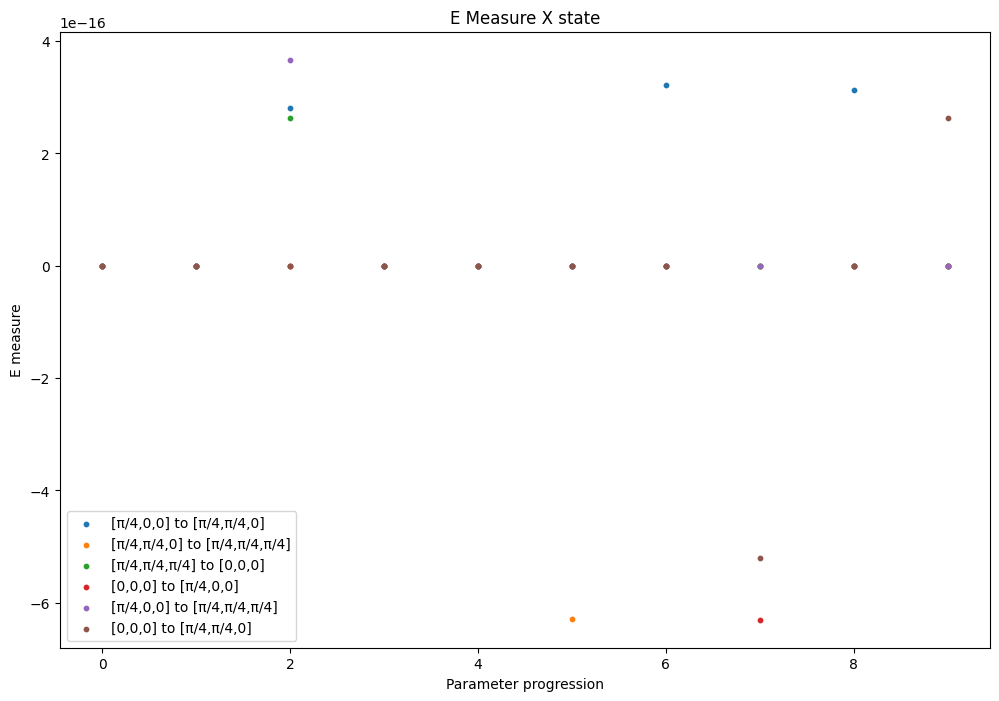

In [13]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import partial_trace, DensityMatrix
import matplotlib.pyplot as plt

# Function to compute the matrix X and flatten it into a column vector
# def compute_four_qubit_state(x, y, z):
#     c_plus = np.cos(x + y)
#     c_minus = np.cos(x - y)
#     s_plus = np.sin(x + y)
#     s_minus = np.sin(x - y)
    
#     # Define the 4x4 matrix X
#     X = np.array([
#         [np.exp(-1j * z) * c_minus, 0, 0, -1j * np.exp(-1j * z) * s_minus],
#         [0, np.exp(1j * z) * c_plus, -1j * np.exp(1j * z) * s_plus, 0],
#         [0, -1j * np.exp(1j * z) * s_plus, np.exp(1j * z) * c_plus, 0],
#         [-1j * np.exp(1j * z) * s_minus, 0, 0, np.exp(-1j * z) * c_minus],
#     ])
    
#     # Flatten X into a 16x1 column vector (in column-major order)
#     state_vector = X.flatten(order="F")
#     return state_vector / np.linalg.norm(state_vector)

def compute_four_qubit_state(x, y, z):
    c_plus = np.cos(x + y)
    c_minus = np.cos(x - y)
    s_plus = np.sin(x + y)
    s_minus = np.sin(x - y)
    
    # Define the 4x4 matrix X with complex dtype
    X = np.array([
        [np.exp(-1j * z) * c_minus, 0, 0, -1j * np.exp(-1j * z) * s_minus],
        [0, np.exp(1j * z) * c_plus, -1j * np.exp(1j * z) * s_plus, 0],
        [0, -1j * np.exp(1j * z) * s_plus, np.exp(1j * z) * c_plus, 0],
        [-1j * np.exp(1j * z) * s_minus, 0, 0, np.exp(-1j * z) * c_minus],
    ], dtype=np.complex128)  # Corrected dtype
    
    state_vector = X.flatten(order="F")
    norm = np.linalg.norm(state_vector)
    # Avoid division by zero by adding a small epsilon if norm is zero
    if norm == 0:
        norm = 1e-10  # Small epsilon to prevent division by zero
    return state_vector / norm



# def compute_four_qubit_state(x, y, z):
#     c_plus = np.cos(x + y)
#     c_minus = np.cos(x - y)
#     s_plus = np.sin(x + y)
#     s_minus = np.sin(x - y)
    
#     # Define the 4x4 matrix X
#     X = np.array([
#         [np.exp(-1j * z) * c_minus, 0, 0, -1j * np.exp(-1j * z) * s_minus],
#         [0, np.exp(1j * z) * c_plus, -1j * np.exp(1j * z) * s_plus, 0],
#         [0, -1j * np.exp(1j * z) * s_plus, np.exp(1j * z) * c_plus, 0],
#         [-1j * np.exp(1j * z) * s_minus, 0, 0, np.exp(-1j * z) * c_minus],
#     ], dtype=object)
    
#     # Flatten X into a 16x1 column vector (in column-major order)
#     state_vector = X.flatten(order="F")
#     return state_vector / np.linalg.norm(state_vector)



# Function to run the simulation, compute the probabilities and return the final value
def calculate_value(x, y, z, sht=100):
    # Compute the four-qubit state
    four_qubit_state = compute_four_qubit_state(x, y, z)

    # Create the circuit (12 qubits, 4 classical bits for measurement)
    qc = QuantumCircuit(12, 4)

    # Step 1: Keep Qubits 0,1,2,3 as |0000⟩
    # No initialization is needed; qubits are |0⟩ by default.

    # Step 2: Apply the computed four-qubit state
    qc.initialize(four_qubit_state, [4, 5, 6, 7])
    qc.initialize(four_qubit_state, [8, 9, 10, 11])

    # Apply Hadamard gates to control qubits (0, 1, 2, 3)
    qc.h([0, 1, 2, 3])

    # Add CX gates for entanglement
    qc.cx(8, 4)
    qc.cx(9, 5)
    qc.cx(10, 6)
    qc.cx(11, 7)

    # Add Toffoli gates
    qc.ccx(0, 4, 8)
    qc.ccx(1, 5, 9)
    qc.ccx(2, 6, 10)
    qc.ccx(3, 7, 11)

    qc.cx(8, 4)
    qc.cx(9, 5)
    qc.cx(10, 6)
    qc.cx(11, 7)

    # Apply Hadamard gates again
    qc.h([0, 1, 2, 3])

    # Measure the control qubits
    qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

    # Simulate the circuit
    simulator = AerSimulator()
    result = simulator.run(qc, shots=sht).result()
    counts = result.get_counts()

    # Extract measurement results and compute probabilities
    p_0000 = counts.get('0000', 0) / sht
    p_0111 = counts.get('0111', 0) / sht
    p_1011 = counts.get('1011', 0) / sht
    p_1101 = counts.get('1101', 0) / sht
    p_1110 = counts.get('1110', 0) / sht
    p_1001 = counts.get('1001', 0) / sht
    p_0101 = counts.get('0101', 0) / sht
    p_0011 = counts.get('0011', 0) / sht
    p_1100 = counts.get('1100', 0) / sht
    p_1010 = counts.get('1010', 0) / sht
    p_1000 = counts.get('1000', 0) / sht
    p_0100 = counts.get('0100', 0) / sht
    p_0010 = counts.get('0010', 0) / sht
    p_0001 = counts.get('0001', 0) / sht
    p_0110 = counts.get('0110', 0) / sht
    p_1111 = counts.get('1111', 0) / sht

    # Print results for debugging
    # print("1:", 2 * (p_0000 + p_0101 + p_0011 + p_0110) - 1)
    # print("2:", 2 * (p_0000 + p_1010 + p_1001 + p_0011) - 1)
    # print("3", 2 * (p_0000 + p_1100 + p_1001 + p_0101) - 1)
    # print("4", 2 * (p_0000 + p_1100 + p_1010 + p_0110) - 1)
    # print("12", 2 * (p_0000 + p_0011 + p_1100) - 1)
    # print("13", 2 * (p_0000 + p_1010 + p_0101) - 1)
    # print("14", 2 * (p_0000 + p_1001 + p_0110) - 1)

    # Calculate values
    tr_3 = 2 * (p_0000 + p_0101 + p_0011 + p_0110) - 1
    tr_2 = 2 * (p_0000 + p_1010 + p_1001 + p_0011) - 1
    tr_1 = 2 * (p_0000 + p_1100 + p_1001 + p_0101) - 1
    tr_0 = 2 * (p_0000 + p_1100 + p_1010 + p_0110) - 1
    tr_01 = 2 * (p_0000 + p_0011+p_1100 +p_1111) - 1
    tr_02 = 2 * (p_0000 + p_1010+p_0101 +p_1111) - 1
    tr_03 = 2 * (p_0000 + p_1001+p_0110+p_1111 ) - 1

    # Final value calculation
    val = (1024 / 27) * (1 - tr_3) * (1 - tr_2) * (1 - tr_1) * (1 - tr_0) * (1 - tr_01) * (1 - tr_02) * (1 - tr_03)

    return val

# Example usage of the function:

# pit=10

# # Define the parameter ranges for different conditions
# c1_ranges = [
#     np.linspace(np.pi/4, np.pi/4, pit), 
#     np.linspace(np.pi/4, np.pi/4, pit), 
#     np.linspace(np.pi/4, 0, pit), 
#     np.linspace(0, np.pi/4, pit), 
#     np.linspace(np.pi/4, np.pi/4, pit),
#     np.linspace(0, np.pi/4, pit)
# ]

# c2_ranges = [
#     np.linspace(0, np.pi/4, pit), 
#     np.linspace(np.pi/4, np.pi/4, pit), 
#     np.linspace(np.pi/4, 0, pit), 
#     np.linspace(0, 0, pit), 
#     np.linspace(0, np.pi/4, pit),
#     np.linspace(0, np.pi/4, pit)
# ]

# c3_ranges = [
#     np.linspace(0, 0, pit), 
#     np.linspace(0, np.pi/4, pit), 
#     np.linspace(np.pi/4, 0, pit), 
#     np.linspace(0, 0, pit), 
#     np.linspace(0, np.pi/4, pit),
#     np.linspace(0, 0, pit)
# ]

# # Labels for the plots
# labels = [
#     "[$\pi/4$,0,0] to [$\pi/4$,$\pi/4$,0]",
#     "[$\pi/4$,$\pi/4$,0] to [$\pi/4$,$\pi/4$,$\pi/4$]",
#     "[$\pi/4$,$\pi/4$,$\pi/4$] to [0,0,0]",
#     "[0,0,0] to [$\pi/4$,0,0]","[$\pi/4$,0,0] to [$\pi/4$,$\pi/4$,$\pi/4$]",
#     "[0,0,0] to [$\pi/4$,$\pi/4$,0]",
    
# ]

# # Create the scatter plot for each set of parameter ranges
# plt.figure(figsize=(12, 8))
# for i in range(6):
#     y = calculate_value(c1_ranges[i], c2_ranges[i], c3_ranges[i])
#     plt.scatter(x, y, label=labels[i],s=10)

# # Add title, labels, and legend
# plt.legend()
# plt.title('E Measure X state')
# plt.xlabel('Parameter distribution')
# plt.ylabel('E measure')
# plt.show()

# # Create a 2x3 subplot for each condition
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# # Flatten the axs array for easy iteration
# axs = axs.flatten()

# # Plot each subplot
# for i in range(6):
#     y = calculate_value(c1_ranges[i], c2_ranges[i], c3_ranges[i])
#     axs[i].plot(x, y, label=labels[i])
#     axs[i].set_title(labels[i])
#     axs[i].legend()

# # Adjust the spacing between plots for better layout
# plt.tight_layout()

# # Show the subplot grid
# plt.show()


# # # Plot the measurement histogram
# # # You can also return `counts` from the function if needed for further analysis or visualization.


# # Create the scatter plot for each set of parameter ranges










# ... [Keep the compute_four_qubit_state and calculate_value functions unchanged] ...

pit=10

# Define the parameter ranges for different conditions
# c1_ranges = [
#     np.linspace(np.pi/4, np.pi/4, pit), 
#     np.linspace(np.pi/4, np.pi/4, pit), 
#     np.linspace(np.pi/4, 0, pit), 
#     np.linspace(0, np.pi/4, pit), 
#     np.linspace(np.pi/4, np.pi/4, pit),
#     np.linspace(0, np.pi/4, pit)
# ]

# c2_ranges = [
#     np.linspace(0, np.pi/4, pit), 
#     np.linspace(np.pi/4, np.pi/4, pit), 
#     np.linspace(np.pi/4, 0, pit), 
#     np.linspace(0, 0, pit), 
#     np.linspace(0, np.pi/4, pit),
#     np.linspace(0, np.pi/4, pit)
# ]

# c3_ranges = [
#     np.linspace(0, 0, pit), 
#     np.linspace(0, np.pi/4, pit), 
#     np.linspace(np.pi/4, 0, pit), 
#     np.linspace(0, 0, pit), 
#     np.linspace(0, np.pi/4, pit),
#     np.linspace(0, 0, pit)
# ]




pit = 10 # Define the number of points

c1_ranges = [
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # π/4 to π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # π/4 to π/4
    np.linspace(1 * np.pi/4, 1* np.pi/4, pit),  # π/4 to 0·π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # 0·π/4 to π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # π/4 to π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit)   # 0·π/4 to π/4
]

c2_ranges = [
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # 0·π/4 to π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # π/4 to π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # π/4 to 0·π/4
    np.linspace(1 * np.pi/4, 1* np.pi/4, pit),  # 0·π/4 to 0·π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # 0·π/4 to π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit)   # 0·π/4 to π/4
]

c3_ranges = [
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # 0·π/4 to 0·π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # 0·π/4 to π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # π/4 to 0·π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # 0·π/4 to 0·π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit),  # 0·π/4 to π/4
    np.linspace(1 * np.pi/4, 1 * np.pi/4, pit)   # 0·π/4 to 0·π/4
]


labels = [
    "[π/4,0,0] to [π/4,π/4,0]",
    "[π/4,π/4,0] to [π/4,π/4,π/4]",
    "[π/4,π/4,π/4] to [0,0,0]",
    "[0,0,0] to [π/4,0,0]",
    "[π/4,0,0] to [π/4,π/4,π/4]",
    "[0,0,0] to [π/4,π/4,0]",
]

# Create the scatter plot for each set of parameter ranges
plt.figure(figsize=(12, 8))
for i in range(6):
    x_vals = np.arange(pit)  # Use index or another progression for the x-axis
    y_vals = []
    for j in range(pit):
        x = c1_ranges[i][j]
        y_param = c2_ranges[i][j]
        z = c3_ranges[i][j]
        val = calculate_value(x, y_param, z, sht=10000)
        y_vals.append(val)
    plt.scatter(x_vals, y_vals, label=labels[i], s=10)

plt.legend()
plt.title('E Measure X state')
plt.xlabel('Parameter progression')
plt.ylabel('E measure')
plt.show()

# # Create a 2x3 subplot grid
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# axs = axs.flatten()

# for i in range(6):
#     x_vals = np.arange(pit)
#     y_vals = []
#     for j in range(pit):
#         x = c1_ranges[i][j]
#         y_param = c2_ranges[i][j]
#         z = c3_ranges[i][j]
#         val = calculate_value(x, y_param, z, sht=1000)
#         y_vals.append(val)
#     axs[i].scatter(x_vals, y_vals, label=labels[i])
#     axs[i].set_title(labels[i])
#     axs[i].legend()

# plt.tight_layout()
# plt.show()


Quantum Circuit:
     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
c: 2/»
     »
«     ┌────────────────────────────────────────────────────────────────────────────────────┐»
«q_0: ┤0                                                                                   ├»
«     │  Initialize(0.64567+0.047909j,0.078571+0.13831j,0.29792+0.48336j,0.15886+0.45593j) │»
«q_1: ┤1                                                                                   ├»
«     ├───────────────────────────────────────────────────────────────────────────────────┬┘»
«q_2: ┤0                                                                                  ├─»
«     │  Initialize(0.36107+0.51384j,0.38584+0.23793j,0.30409+0.11959j,0.074224+0.53649j) │ »
«q_3: ┤1                                                                                  ├─»
«     └┬─────────────────────────────────────────────────────────────────────────────────┬┘ »
«q_4: ─┤0                       

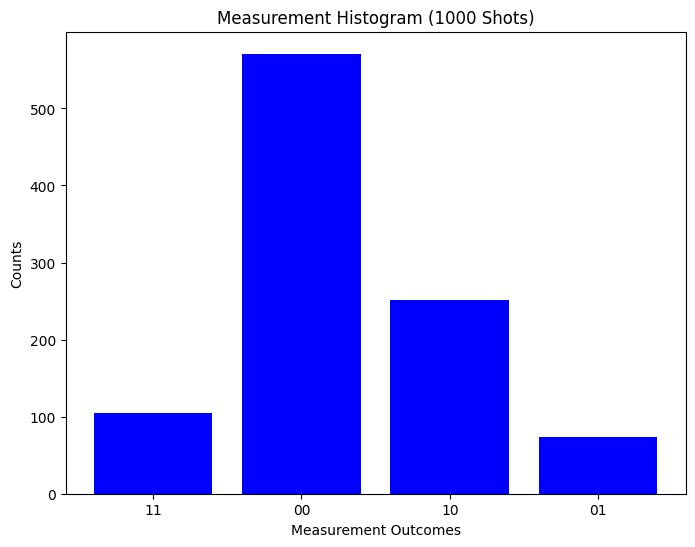

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import partial_trace, DensityMatrix
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a random n-qubit state
def random_n_qubit_state(n):
    state = np.random.rand(2**n) + 1j * np.random.rand(2**n)  # Complex random numbers
    state = state / np.linalg.norm(state)  # Normalize the state
    return state

# Function to create a random circuit with n qubits and measurements on n control qubits
def create_circuit(n):
    # Create the quantum circuit with n qubits and n classical bits for measurement
    qc = QuantumCircuit(n*3, n)

    # Generate random state for each party (each party has n qubits)
    for i in range(3):
        random_state = random_n_qubit_state(n)
        qc.initialize(random_state, [i*n + j for j in range(n)])  # Apply random state to the n qubits

    # Apply Hadamard gates to control qubits (0, 1, 2)
    for i in range(n):
        qc.h(i)

    # Add CX gates for interaction between the parties
    for i in range(n):
        qc.cx(i + n, i)
        qc.cx(i + 2*n, i)

    # Add Toffoli gates (controlled-controlled-X gates)
    for i in range(n):
        qc.ccx(i, i + n, i + 2*n)
        qc.cx(i + n, i)
        qc.cx(i + 2*n, i)

    # Apply Hadamard gates again
    for i in range(n):
        qc.h(i)

    # Measure the control qubits
    qc.measure([i for i in range(n)], [i for i in range(n)])

    return qc

# Function to compute the partial trace for arbitrary subsystems
def partial_trace_define(state, subsystem_trace_out, dimension):
    """
    Compute the partial trace of a density matrix by tracing out the specified subsystem.
    
    Args:
    - state: The density matrix (as a numpy array or qiskit DensityMatrix object).
    - subsystem_trace_out: List of subsystems to trace out.
    - dimension: The total dimension of the quantum system (for example, 2^n for n qubits).
    
    Returns:
    - The reduced density matrix after tracing out the specified subsystems.
    """
    if isinstance(state, np.ndarray):
        rho = DensityMatrix(state)
    else:
        rho = state
    reduced_rho = partial_trace(rho, subsystem_trace_out)
    return reduced_rho

# Generalized process for creating and simulating a quantum circuit for n qubits
def simulate_for_n_qubits(n):
    # Create the circuit
    qc = create_circuit(n)

    # Draw the circuit
    qc.draw('mpl')
    plt.show()
    print("Quantum Circuit:")
    print(qc.draw(output='text'))

    # Simulate the circuit
    simulator = AerSimulator()
    result = simulator.run(qc, shots=1000).result()
    counts = result.get_counts()

    # Plot the measurement histogram
    plot_histogram(counts)
    plt.show()

    # Create the density matrix for the subsystem
    random_state = random_n_qubit_state(n)
    rho_123 = DensityMatrix(np.outer(random_state, random_state.conj()))  # Convert pure state to density matrix

    # Compute reduced density matrices for all possible combinations of tracing out subsystems
    reduced_densities = {}
    for i in range(n):
        reduced_densities[f'rho_{i}'] = partial_trace_define(rho_123, [j for j in range(n) if j != i], 2**n)

    # Compute Tr[rho_alpha^2] for all reduced density matrices
    traces_squared = {}
    for key, rho in reduced_densities.items():
        traces_squared[key] = np.trace(rho.data @ rho.data)

    # Compute the function value
    c_s = n  # Since we have n parties
    function_value = (1 / (2**c_s)) * sum(traces_squared.values()) + 2

    # Print results
    print("Function Value:", function_value)

    # Extract labels and values from counts
    labels = list(counts.keys())
    values = list(counts.values())

    # Plot the histogram using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color='blue')
    plt.xlabel('Measurement Outcomes')
    plt.ylabel('Counts')
    plt.title(f'Measurement Histogram ({1000} Shots)')
    plt.show()

# Example usage for n=3 (3 qubits per party)
simulate_for_n_qubits(2)


In [ ]:
import numpy as np
import sympy as sp

def generate_column_matrix():
    """Generate a 16×1 column matrix with symbolic elements a_0000, a_0001, ..., a_1111."""
    labels = [sp.Symbol(f'a_{format(i, "04b")}') for i in range(16)]
    column_matrix = np.array(labels, dtype=object).reshape(16, 1)
    return column_matrix

def compute_density_matrix(state_vector):
    """Compute density matrix ρ = |ψ⟩⟨ψ|."""
    return np.outer(state_vector, np.conjugate(state_vector))

def partial_trace(density_matrix, subsystems_to_trace_out):
    """
    Compute the partial trace of a density matrix.

    Args:
        density_matrix (numpy array): The full density matrix.
        subsystems_to_trace_out (list): List of qubits to trace out.

    Returns:
        numpy array: The reduced density matrix.
    """
    num_qubits = int(np.log2(density_matrix.shape[0]))  # Total number of qubits
    keep_dims = [i for i in range(num_qubits) if i not in subsystems_to_trace_out]  # Qubits to keep
    
    # Reshape density matrix into a tensor of shape (2,2,...,2,2,...,2,2)
    reshaped_rho = density_matrix.reshape([2] * (2 * num_qubits))
    
    # Sort qubits in decreasing order to avoid index shift issues
    subsystems_to_trace_out = sorted(subsystems_to_trace_out, reverse=True)

    for i, qubit in enumerate(subsystems_to_trace_out):
        num_remaining_dims = reshaped_rho.ndim // 2  # Number of qubits left
        axis1 = qubit  # First occurrence
        axis2 = qubit + num_remaining_dims  # Corresponding second occurrence
        reshaped_rho = np.trace(reshaped_rho, axis1=axis1, axis2=axis2)
    
    # Reshape back to a square matrix
    final_dim = 2 ** len(keep_dims)
    return reshaped_rho.reshape((final_dim, final_dim))

# Step 1: Generate column matrix
column_matrix = generate_column_matrix()
print("Column Matrix:")
print(column_matrix)

# Step 2: Compute Density Matrix
state_vector = column_matrix.flatten()
density_matrix = compute_density_matrix(state_vector)
print("\nDensity Matrix:")
print(density_matrix)

# Step 3: Compute Reduced Density Matrices (Tracing out different subsystems)
rdm1 = partial_trace(density_matrix, [1, 2, 3])  # Trace out qubits 1,2,3
rdm2 = partial_trace(density_matrix, [0, 2, 3])  # Trace out qubits 0,2,3
rdm3 = partial_trace(density_matrix, [0, 1, 3])  # Trace out qubits 0,1,3

print("\nReduced Density Matrix 1 (Tracing out qubits 1,2,3):")
print(rdm1)
print("\nReduced Density Matrix 2 (Tracing out qubits 0,2,3):")
print(rdm2)
print("\nReduced Density Matrix 3 (Tracing out qubits 0,1,3):")
print(rdm3)


Column Matrix:
[[a_0000]
 [a_0001]
 [a_0010]
 [a_0011]
 [a_0100]
 [a_0101]
 [a_0110]
 [a_0111]
 [a_1000]
 [a_1001]
 [a_1010]
 [a_1011]
 [a_1100]
 [a_1101]
 [a_1110]
 [a_1111]]

Density Matrix:
[[a_0000*conjugate(a_0000) a_0000*conjugate(a_0001)
  a_0000*conjugate(a_0010) a_0000*conjugate(a_0011)
  a_0000*conjugate(a_0100) a_0000*conjugate(a_0101)
  a_0000*conjugate(a_0110) a_0000*conjugate(a_0111)
  a_0000*conjugate(a_1000) a_0000*conjugate(a_1001)
  a_0000*conjugate(a_1010) a_0000*conjugate(a_1011)
  a_0000*conjugate(a_1100) a_0000*conjugate(a_1101)
  a_0000*conjugate(a_1110) a_0000*conjugate(a_1111)]
 [a_0001*conjugate(a_0000) a_0001*conjugate(a_0001)
  a_0001*conjugate(a_0010) a_0001*conjugate(a_0011)
  a_0001*conjugate(a_0100) a_0001*conjugate(a_0101)
  a_0001*conjugate(a_0110) a_0001*conjugate(a_0111)
  a_0001*conjugate(a_1000) a_0001*conjugate(a_1001)
  a_0001*conjugate(a_1010) a_0001*conjugate(a_1011)
  a_0001*conjugate(a_1100) a_0001*conjugate(a_1101)
  a_0001*conjugate(a_1110)

In [ ]:
import numpy as np
import sympy as sp

# Step 1: Generate the column matrix for a three-qubit system
def generate_column_matrix():
    """Generate an 8×1 column matrix with symbolic elements a_000, a_001, ..., a_111."""
    labels = [sp.Symbol(f'a_{format(i, "03b")}') for i in range(8)]  # 3-bit labels (000 to 111)
    column_matrix = np.array(labels, dtype=object).reshape(8, 1)
    return column_matrix

# Step 2: Compute the density matrix ρ = |ψ⟩⟨ψ|
def compute_density_matrix(state_vector):
    """Compute the density matrix ρ = |ψ⟩⟨ψ|."""
    return np.outer(state_vector, np.conjugate(state_vector))

# Step 3: Compute the trace of ρ²
def compute_trace_square(density_matrix):
    """Compute Tr(ρ²) to check purity."""
    rho_sympy = sp.Matrix(density_matrix)  # Convert to SymPy matrix
    return sp.simplify(sp.trace(rho_sympy @ rho_sympy))

# Step 4: Compute Symbolic Partial Trace (Updated version)
def partial_trace_symbolic(rho, subsystems_to_trace_out, total_qubits=3):
    """Compute the symbolic partial trace of a density matrix over specified subsystems."""
    dim = 2 ** total_qubits  # Total dimension
    # Convert the rho to a numpy array
    rho_array = np.array(rho, dtype=object)
    
    # Reshape the density matrix to a tensor (multi-dimensional array)
    rho_tensor = rho_array.reshape([2] * (2 * total_qubits))  # Reshape to tensor form
    
    # Trace out the subsystems by summing over the relevant axes
    for qubit in sorted(subsystems_to_trace_out, reverse=True):
        axis_to_sum = (2 * qubit, 2 * qubit + 1)  # Convert list to tuple
        rho_tensor = np.sum(rho_tensor, axis=axis_to_sum)
    
    # Compute the final size after tracing out the subsystems
    final_dim = 2 ** (total_qubits - len(subsystems_to_trace_out))
    
    # Return the reduced density matrix (it should now fit the correct size)
    return rho_tensor.reshape(final_dim, final_dim)

# Main Execution
column_matrix = generate_column_matrix()
state_vector = np.array(column_matrix, dtype=object).flatten()  # Convert to 1D array
density_matrix = compute_density_matrix(state_vector)

# Display results
print("\nColumn Matrix (|ψ⟩):")
print(column_matrix)

print("\nDensity Matrix (ρ = |ψ⟩⟨ψ|):")
print(density_matrix)

# Compute trace of ρ²
trace_square = compute_trace_square(density_matrix)
print("\nTrace of ρ² (Purity Check):", trace_square)

# Compute reduced density matrices symbolically
rdm1 = partial_trace_symbolic(density_matrix, [1, 2])  # Tracing out qubits 1,2
rdm2 = partial_trace_symbolic(density_matrix, [0, 2])  # Tracing out qubits 0,2
rdm3 = partial_trace_symbolic(density_matrix, [0, 1])  # Tracing out qubits 0,1

print("\nReduced Density Matrix ρ₁ (Tracing out qubits 1,2):")
print(rdm1)

print("\nReduced Density Matrix ρ₂ (Tracing out qubits 0,2):")
print(rdm2)

print("\nReduced Density Matrix ρ₃ (Tracing out qubits 0,1):")
print(rdm3)



Column Matrix (|ψ⟩):
[[a_000]
 [a_001]
 [a_010]
 [a_011]
 [a_100]
 [a_101]
 [a_110]
 [a_111]]

Density Matrix (ρ = |ψ⟩⟨ψ|):
[[a_000*conjugate(a_000) a_000*conjugate(a_001) a_000*conjugate(a_010)
  a_000*conjugate(a_011) a_000*conjugate(a_100) a_000*conjugate(a_101)
  a_000*conjugate(a_110) a_000*conjugate(a_111)]
 [a_001*conjugate(a_000) a_001*conjugate(a_001) a_001*conjugate(a_010)
  a_001*conjugate(a_011) a_001*conjugate(a_100) a_001*conjugate(a_101)
  a_001*conjugate(a_110) a_001*conjugate(a_111)]
 [a_010*conjugate(a_000) a_010*conjugate(a_001) a_010*conjugate(a_010)
  a_010*conjugate(a_011) a_010*conjugate(a_100) a_010*conjugate(a_101)
  a_010*conjugate(a_110) a_010*conjugate(a_111)]
 [a_011*conjugate(a_000) a_011*conjugate(a_001) a_011*conjugate(a_010)
  a_011*conjugate(a_011) a_011*conjugate(a_100) a_011*conjugate(a_101)
  a_011*conjugate(a_110) a_011*conjugate(a_111)]
 [a_100*conjugate(a_000) a_100*conjugate(a_001) a_100*conjugate(a_010)
  a_100*conjugate(a_011) a_100*conjugate

In [ ]:
import numpy as np
import sympy as sp

# Step 1: Generate the column matrix for a three-qubit system
def generate_column_matrix():
    """Generate an 8×1 column matrix with symbolic elements a_000, a_001, ..., a_111."""
    labels = [sp.Symbol(f'a_{format(i, "03b")}') for i in range(8)]  # 3-bit labels (000 to 111)
    column_matrix = np.array(labels, dtype=object).reshape(8, 1)
    return column_matrix

# Step 2: Compute the density matrix ρ = |ψ⟩⟨ψ|
def compute_density_matrix(state_vector):
    """Compute the density matrix ρ = |ψ⟩⟨ψ|."""
    return np.outer(state_vector, np.conjugate(state_vector))

# Step 3: Compute the trace of ρ²
def compute_trace_square(density_matrix):
    """Compute Tr(ρ²) to check purity."""
    rho_sympy = sp.Matrix(density_matrix)  # Convert to SymPy matrix
    return sp.simplify(sp.trace(rho_sympy @ rho_sympy))

# Step 4: Compute Symbolic Partial Trace (Updated version)
def partial_trace_symbolic(rho, subsystems_to_trace_out, total_qubits=3):
    """Compute the symbolic partial trace of a density matrix over specified subsystems."""
    dim = 2 ** total_qubits  # Total dimension
    # Convert the rho to a numpy array
    rho_array = np.array(rho, dtype=object)
    
    # Reshape the density matrix to a tensor (multi-dimensional array)
    rho_tensor = rho_array.reshape([2] * (2 * total_qubits))  # Reshape to tensor form
    
    # Trace out the subsystems by summing over the relevant axes
    for qubit in sorted(subsystems_to_trace_out, reverse=True):
        axis_to_sum = (2 * qubit, 2 * qubit + 1)  # Convert list to tuple
        rho_tensor = np.sum(rho_tensor, axis=axis_to_sum)
    
    # Compute the final size after tracing out the subsystems
    final_dim = 2 ** (total_qubits - len(subsystems_to_trace_out))
    
    # Return the reduced density matrix (it should now fit the correct size)
    return rho_tensor.reshape(final_dim, final_dim)

# Step 5: Square of the reduced density matrix
def compute_density_matrix_square(rdm):
    """Compute the square of a reduced density matrix ρ²."""
    return np.dot(rdm, rdm)

# Step 6: Compute the trace of the square of a matrix
def trace_of_square(matrix):
    """Compute the trace of the square of a matrix."""
    return np.trace(matrix)

# Main Execution
column_matrix = generate_column_matrix()
state_vector = np.array(column_matrix, dtype=object).flatten()  # Convert to 1D array
density_matrix = compute_density_matrix(state_vector)

# Display results
print("\nColumn Matrix (|ψ⟩):")
print(column_matrix)

print("\nDensity Matrix (ρ = |ψ⟩⟨ψ|):")
print(density_matrix)

# Compute reduced density matrices symbolically
rdm1 = partial_trace_symbolic(density_matrix, [1, 2])  # Tracing out qubits 1,2
rdm2 = partial_trace_symbolic(density_matrix, [0, 2])  # Tracing out qubits 0,2
rdm3 = partial_trace_symbolic(density_matrix, [0, 1])  # Tracing out qubits 0,1

# Display reduced density matrices
print("\nReduced Density Matrix ρ₁ (Tracing out qubits 1,2):")
print(rdm1)

print("\nReduced Density Matrix ρ₂ (Tracing out qubits 0,2):")
print(rdm2)

print("\nReduced Density Matrix ρ₃ (Tracing out qubits 0,1):")
print(rdm3)

# Compute the square of the reduced density matrices
rdm1_square = compute_density_matrix_square(rdm1)
rdm2_square = compute_density_matrix_square(rdm2)
rdm3_square = compute_density_matrix_square(rdm3)

# Display the squares of the reduced density matrices
print("\nSquare of Reduced Density Matrix ρ₁:")
print(rdm1_square)

print("\nSquare of Reduced Density Matrix ρ₂:")
print(rdm2_square)

print("\nSquare of Reduced Density Matrix ρ₃:")
print(rdm3_square)

# Compute the trace of the squares of the reduced density matrices
trace_rdm1_square = trace_of_square(rdm1_square)
trace_rdm2_square = trace_of_square(rdm2_square)
trace_rdm3_square = trace_of_square(rdm3_square)

# Display the traces of the squares of the reduced density matrices
print("\nTrace of the square of Reduced Density Matrix ρ₁:")
print(trace_rdm1_square)

print("\nTrace of the square of Reduced Density Matrix ρ₂:")
print(trace_rdm2_square)

print("\nTrace of the square of Reduced Density Matrix ρ₃:")
print(trace_rdm3_square)



Column Matrix (|ψ⟩):
[[a_000]
 [a_001]
 [a_010]
 [a_011]
 [a_100]
 [a_101]
 [a_110]
 [a_111]]

Density Matrix (ρ = |ψ⟩⟨ψ|):
[[a_000*conjugate(a_000) a_000*conjugate(a_001) a_000*conjugate(a_010)
  a_000*conjugate(a_011) a_000*conjugate(a_100) a_000*conjugate(a_101)
  a_000*conjugate(a_110) a_000*conjugate(a_111)]
 [a_001*conjugate(a_000) a_001*conjugate(a_001) a_001*conjugate(a_010)
  a_001*conjugate(a_011) a_001*conjugate(a_100) a_001*conjugate(a_101)
  a_001*conjugate(a_110) a_001*conjugate(a_111)]
 [a_010*conjugate(a_000) a_010*conjugate(a_001) a_010*conjugate(a_010)
  a_010*conjugate(a_011) a_010*conjugate(a_100) a_010*conjugate(a_101)
  a_010*conjugate(a_110) a_010*conjugate(a_111)]
 [a_011*conjugate(a_000) a_011*conjugate(a_001) a_011*conjugate(a_010)
  a_011*conjugate(a_011) a_011*conjugate(a_100) a_011*conjugate(a_101)
  a_011*conjugate(a_110) a_011*conjugate(a_111)]
 [a_100*conjugate(a_000) a_100*conjugate(a_001) a_100*conjugate(a_010)
  a_100*conjugate(a_011) a_100*conjugate